# Putting regression to use

Last time we used linear regression, each cup of coffee always cost two dollars, so everything lined up exactly. Let's move on to a **slightly more realistic situation**. We'll look at what regression actually means, as well as work out statsmodels a bit more.

<p class="reading-options">
  <a class="btn" href="/regression/linear-regression-part-two">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/regression/notebooks/Linear Regression Part Two.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="#">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

In [2]:
# pandas for data, statsmodels for regression, seaborn for graphs
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

sns.set_style("darkgrid")

%matplotlib inline

## Working with statsmodels

The real world is rarely as simple and exact as our coffee example!

Let's say we're a bad driver. A _terrible_ driver.

* We drove 2,000 miles and got in 2 crashes.
* We drove another 50,000 miles, got in 48 crashes.
* We drove another 30,000 miles, got in 33 crashes.

Linear regression is: **how is the number of miles we drive related to the number of crashes we're gotten in?** If we look at the number, it isn't so hard: about every 1,000 miles we get in an accident.

We don't get in a crash _exactly_ every 1,000 miles, but it's roughly correct. Let's see how this looks with code.

In [8]:
df = pd.DataFrame([
    { 'miles': 2000, 'crashes': 2 },
    { 'miles': 50000, 'crashes': 48 },
    { 'miles': 30000, 'crashes': 33 },
])
df

,miles,crashes
0,2000,2
1,50000,48
2,30000,33


In [9]:
# What effect does the number of miles driven have on the number of crashes?
model = smf.ols(formula='crashes ~ miles', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     94.98
Date:                Mon, 30 Dec 2019   Prob (F-statistic):             0.0651
Time:                        11:24:47   Log-Likelihood:                -6.2682
No. Observations:                   3   AIC:                             16.54
Df Residuals:                       1   BIC:                             14.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2110      3.345      0.362      0.779     -41.296      43.718
miles          0.0010   9.93e-05      9.746      0.065      -0.000       0.002
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.674
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.511
Skew:                           0.678   Prob(JB):                        0.774
Kurtosis:                       1.500   Cond. No.                     5.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our coefficient is `0.0010`, which means "for every one mile we drive, we get in roughly an additional 0.0010 crashes." That... isn't really how people talk, is it?

When we used our brains instead of math, we said "one crash for every **one thousand** miles." These two rates are actually the same thing! What our brain did was instead of thinking about 2000 miles, 50,000 miles, and 30,000 miles, we automatically thought about 2k miles, 50k miles, and 30k miles.

|miles|miles in thousands|crashes|
|---|---|---|
|2000|2|2|
|50,000|50|48|
|30,000|30|33|

Our brains then did the predictions based on the _thousands of miles_, not on every single mile. If only statsmodels were as intelligent as us!

### Calculations in formulas

It turns out **we can put that calculation right into our regression formula!** The Python library [numpy](https://numpy.org/) is going to help us out with the division

In [5]:
import numpy as np

# What effect does the number of miles driven have on the number of crashes?
# Unfortunately we can't just do miles / 1000! it's np.divide or nothing.
model = smf.ols(formula='crashes ~ np.divide(miles, 1000)', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     94.98
Date:                Mon, 30 Dec 2019   Prob (F-statistic):             0.0651
Time:                        11:21:16   Log-Likelihood:                -6.2682
No. Observations:                   3   AIC:                             16.54
Df Residuals:                       1   BIC:                             14.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.2110      3.345      0.362      0.779     -41.296      43.718
np.divide(miles, 1000)     0.9679      0.099      9.746      0.065      -0.294       2.230
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.674
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.511
Skew:                           0.678   Prob(JB):                        0.774
Kurtosis:                       1.500   Cond. No.                         57.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

That's a little easier: **for every 1000 miles driven, we get in 0.9679 crashes.** Although `np.divide(miles, 1000)` looks slightly unpleasant as a coefficient, at least it reminds us that the measurement is in thousands.

### New columns for the regression

Instead of using `np.divide`, we could also change the data itself. It's easy to make a new column where we've converted our miles into _thousands of miles_.

In [6]:
df['miles_1k'] = df.miles / 1000
df

,miles,crashes,miles_1k
0,2000,2,2.0
1,50000,48,50.0
2,30000,33,30.0


We can then use use thousands of miles instead of miles in our regression formula.

In [7]:
# What effect does the number of miles driven (in thousands) have on the number of crashes?
model = smf.ols(formula='crashes ~ miles_1k', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     94.98
Date:                Mon, 30 Dec 2019   Prob (F-statistic):             0.0651
Time:                        11:21:29   Log-Likelihood:                -6.2682
No. Observations:                   3   AIC:                             16.54
Df Residuals:                       1   BIC:                             14.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2110      3.345      0.362      0.779     -41.296      43.718
miles_1k       0.9679      0.099      9.746      0.065      -0.294       2.230
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.674
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.511
Skew:                           0.678   Prob(JB):                        0.774
Kurtosis:                       1.500   Cond. No.                         57.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Neither of those techniques is better than the other: choosing one method over the other depends on your workflow and what makes the most sense to you!

## It's just an estimate

Now imagine instead of a few data points, we had a _ton_ of them.

Instead of just _one_ person driving 2,000 miles, we have a _hundred_ people. Many of them got in around 2 crashes, but some had fewer and some had more. Then we have another hundred people who drove 50,000 miles, and some of them got into 50 crashes _exactly_, but again: some fewer, some more.

Linear regression is the idea that we can **roughly** figure out for every thousand miles, how often someone gets in a crash. It doesn't have to be _exactly right_ for every person, and **it _isn't_ going to be exactly right** - some people get in more crashes, some people get in fewer crashes. The regression is just a **rough explanation** of how miles driven relates to crashes, and that's all we're interested in.

Let's see how our regression from above looks after adding in a few more drivers.

In [58]:
df = pd.DataFrame([
    {'miles': 2000, 'crashes': 2},
    {'miles': 2000, 'crashes': 0},
    {'miles': 2000, 'crashes': 3},
    {'miles': 5000, 'crashes': 3},
    {'miles': 5000, 'crashes': 6},
    {'miles': 5000, 'crashes': 5}
])
df

,miles,crashes
0,2000,2
1,2000,0
2,2000,3
3,5000,3
4,5000,6
5,5000,5


It's a little more varied now - after 2,00 miles people have gotten in up to 3 crashes, but one person didn't have any! And it's the same at 5,000 miles - some people haven't had many crashes, while others have had a lot.

What's the regression look like?

In [59]:
# What effect does the number of miles driven have on the number of crashes?
model = smf.ols(formula='crashes ~ np.divide(miles, 1000)', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     5.786
Date:                Sun, 08 Dec 2019   Prob (F-statistic):             0.0739
Time:                        10:49:39   Log-Likelihood:                -9.8391
No. Observations:                   6   AIC:                             23.68
Df Residuals:                       4   BIC:                             23.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.3333      1.583     -0.211      0.844      -4.729       4.062
np.divide(miles, 1000)     1.0000      0.416      2.405      0.074      -0.154       2.154
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.429
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.708
Skew:                          -0.382   Prob(JB):                        0.702
Kurtosis:                       1.500   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for miles is similar to the one before:

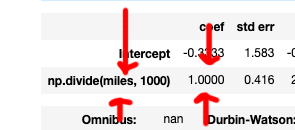

**For every one thousand miles these people drive, they get into about 1 crash.** Again: regression isn't going to be exact, it's just going to be a rough estimate.

But if after 2,000 miles some people have zero crashes and some have a few crashes... **how good of an estimate is our regression?** Luckily, it's not too hard to answer!

## Reviewing our model

### Evaluating with r squared

When you perform a regerssion, one of the pieces of information you get is called **r squared**. You can find it in the top right-hand corner of the result summary.

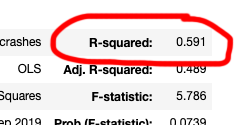

R squared is one explanation of **how good your regression is**.

* If our R squared was 1.0, 100% of the change in crashes can be explained by the number of miles
* If our R squared is 0.0, 0% of the change in crashes can be explained by the number of miles

In this case, our R squared is 0.591, which means the number of miles driven counts for about 60% of how many crashes someone gets into. The other 40% can be things like weather, luck, driving skill - other things we aren't measuring here, but which might factor in.

**Remember our coffee example?** Because no one tipped, the number of cups of coffee helped us **exactly** claculate how much revenue we made.

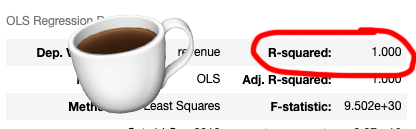

Since our R-squared is 1.0, 100% of the revenue is explained by the number of coffees sold.

### But the graphs!!!

Whenever people talk about linear regression, they **love to draw graphs**. Because we want to fit in, let's do that with our car crashes dataset.

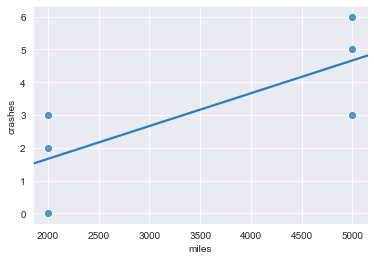

In [60]:
sns.regplot(x='miles', y='crashes', ci=None, data=df, color='#2c7fb8')

**Every single dot is one of our data points:** miles are along the bottom, and crashes are up and down. More to the right? More miles. Up higher? More crashes.

Let's annotate that.

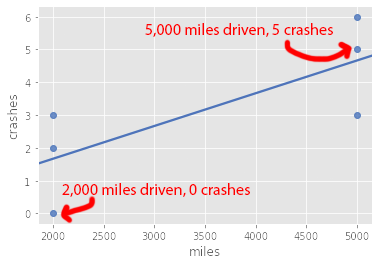

**The line is our regression.** It shows us the relationship between miles driven and how many crashes are expected. We can pick any point on the x axis - the number of miles driven - and make a prediction for how many crashes someone will have after driving that much.

How many crashes do we predict for someone who has driven **4,000 miles?**

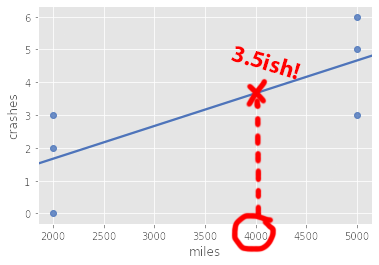

You of course can't _actually_ experience 3.5 crashes, but based on everyone's else's experience this 4,000 mile person will probably experience a number of crashes somewhere around there.

Although graphing seems less technical than looking at your regression summary, sometimes a picture reveal more than a whole screen full of numbers. Check out [Anscombe's Quarter](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) for an example of why.

## Predictions and residuals

How unusual is each one of the drivers we're looking at? Based on the number of miles driven, the regression predicts a number of crashes the driver "should" have gotten in. While sometimes the actual value might match the predicted value, **most drivers did better or worse than the predicted number of crashes**.

The difference between the predicted value and the real value is called the **error** or **redisual**.

In [63]:
df['predicted'] = results.predict()
df['residual'] = results.resid
df

,miles,crashes,residual,predicted
0,2000,2,0.333333,1.666667
1,2000,0,-1.666667,1.666667
2,2000,3,1.333333,1.666667
3,5000,3,-1.666667,4.666667
4,5000,6,1.333333,4.666667
5,5000,5,0.333333,4.666667


We can't get into 0.3333 crashes, but you get the idea! Residuals are typically used to find datapoints that are performing above or below expectations.

For example, the Dallas Morning News used residuals on standardized tests to find schools that performed way way way better than expected, which then unleashed a cheating scandal! See the project page for more details.

### Predictions with new data

Before we drew a line to estimate the number of crashes for someone who'd driven 4,000 miles. Drawing is so low-tech, let's try statsmodels instead! And while we're at it we can ask for predictions for a few other drivers, too.

In [10]:
df = pd.DataFrame([
    { 'miles': 1000 },
    { 'miles': 4000 },
    { 'miles': 2500 },
    { 'miles': 7500 }
])
df

,miles
0,1000
1,4000
2,2500
3,7500


To make a prediction, we're going to use the `results` variable. All it takes is `.predict` and we're good to go! The regression model memorized the columns we're interested in thanks to the formula, so it pulls them right out of the dataframe.

In [67]:
df['predicted_crashes'] = results.predict(df)
df

,miles,predicted_crashes
0,1000,0.666667
1,4000,3.666667
2,2500,2.166667
3,7500,7.166667


The first person has driven a thousand miles, and "should" have been in about **0.7 crashes**. While no, someone can't _actually_ get into 0.7 crashes, we shouldn't be surprised if this person experiences one soon.

We can plot all of our predictions, but they won't be very exciting. Since the prediction is the same as the regression line, they're all just going to sit right on top of that line!

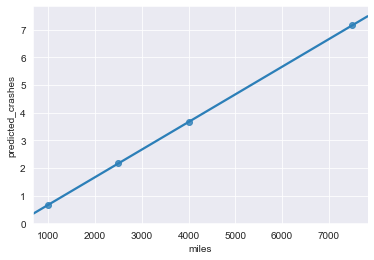

In [68]:
sns.regplot(x='miles', y='predicted_crashes', ci=None, data=df, color='#2c7fb8')

Real drivers will most likely have more or less crashes than what we're predicting, but hey: sometimes you just want to make an educated guess!

## Review

In this section we looked at **linear regression**, the process of estimating how an input (miles driven) is related to an output (crashes experienced). We used the statsmodels library to perform statsmodels using both the formula and dataframes method.

We also looked at **residuals**, which are the difference between the predicted value and actual value for known datapoints. For data that we haven't seen before, we can use the regression to **make predictions**.